In [0]:
#Mount drive files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
#install fast ai
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


In [0]:
#import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [3]:
#get biopaper data 
import os
from os.path import *
trainCsvPath = Path('drive/My Drive/Year5/csc4006 Final Project/data/')
fileName = 'bioPaperExport_text_label.csv'
df = pd.read_csv(join(trainCsvPath,fileName))
df.shape

(29319, 2)

In [0]:
imdb = untar_data(URLs.IMDB_SAMPLE)
imdb

PosixPath('/root/.fastai/data/imdb_sample')

In [0]:
fast_data_lm = (TextList
           .from_df(df, cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [0]:
train = fast_data_lm.train_dl
valid = fast_data_lm.valid_dl
trainS = fast_data_lm.train_ds
validS = fast_data_lm.valid_ds

In [0]:
trainDf = trainS.to_df()

AttributeError: ignored

In [0]:
trainDf.shape

AttributeError: ignored

In [0]:
dir(fast_data_lm)


In [0]:
labelLists.lists[1][0]

(Text xxbos [ 2 4 xxunk 25 ... xxunk 12 xxunk 10 ], EmptyLabel )

In [0]:
dir(labelLists)

In [0]:
fast_data_lm.show_batch()

In [0]:
##try with classes above 800
##Remove categories less than 800
##changes orig
portion_df = df.copy()
for lb in portion_df.label.unique():
  if(portion_df[portion_df.label == lb].shape[0] < 800):
    portion_df = portion_df[portion_df.label != lb]
    print('remove',lb,'new df',portion_df.shape)

In [0]:
textPath = 'drive/My Drive/Year5/csc4006 Final Project/data/'
textCsv = 'bioPaperExport_text_label.csv'

In [0]:
df.label.unique()
all_labels = ['neuroscience', 'cancer biology', 'cell biology', 'bioengineering', 'molecular biology', 'biochemistry',
       'developmental biology', 'biophysics', 'systems biology', 'plant biology', 'evolutionary biology', 'zoology',
       'bioinformatics', 'animal behavior and cognition', 'ecology', 'genomics',
       'scientific communication and education', 'genetics', 'immunology', 'pharmacology and toxicology',
       'microbiology', 'physiology', 'epidemiology', 'synthetic biology', 'clinical trials', 'pathology',
       'paleontology', 'unknown']

small_categories = ['bioengineering','animal behavior and cognition','physiology','synthetic biology','pharmacology and toxicology',
                    'scientific communication and education','pathology','zoology','clinical trials','paleontology','unknown']


In [0]:
##Test binary classification for categories: bioinformatics, microbiology
binary_df = pd.concat([df[df.label == 'bioinformatics'],df[df.label == 'microbiology']])
#df.shape
#df.label.unique()
binary_df.label.value_counts()
df = binary_df

In [5]:
df.label.value_counts()

bioinformatics    2897
microbiology      2452
Name: label, dtype: int64

In [0]:
##try 3 class with 1000 each
##Test binary classification for categories: bioinformatics, microbiology
tri_df = pd.concat([df[df.label == 'bioinformatics'],df[df.label == 'microbiology'],df[df.label == 'genomics']])
#df.shape
#df.label.unique()
#tri_df.label.value_counts()



genomics          2918
bioinformatics    2897
microbiology      2452
Name: label, dtype: int64

In [0]:
##Sample 1000 rows for each category
##Use sample_df
sampled_df = pd.DataFrame(columns=['label','text'])
for lb in df.label.unique():
  sample_category_df = df[df.label == lb].sample(n=1000)
  #print(sample_category_df.shape)
  sampled_df = pd.concat([sampled_df,sample_category_df])
  
sampled_df.label.value_counts()
df = sampled_df

In [0]:
#Split data into training/testing sets
from sklearn.model_selection import train_test_split
b_trainDf, b_testDf = train_test_split(binary_df,stratify=binary_df['label'], test_size = 0.2, random_state = 11)
t_trainDf, t_testDf = train_test_split(sampled_df,stratify=sampled_df['label'], test_size = 0.2, random_state = 11)
trainDf, testDf = train_test_split(df,stratify=df['label'], test_size = 0.2, random_state = 11)

p_trainDf, p_testDf = train_test_split(portion_df,stratify=portion_df['label'], test_size = 0.2, random_state = 11)

print(trainDf.shape,testDf.shape)
print(t_trainDf.shape,t_testDf.shape)
print(b_trainDf.shape,b_testDf.shape)
print(p_trainDf.shape,p_testDf.shape)

(23455, 2) (5864, 2)
(9600, 2) (2400, 2)
(4279, 2) (1070, 2)
(20347, 2) (5087, 2)


In [0]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(df,stratify=df['label'], test_size = 0.2, random_state = 11)

In [9]:
trainDf.shape, testDf.shape

((1600, 2), (400, 2))

In [0]:
##tokenising
ex_text = df['text'][22]
tokenizer = Tokenizer()
tok = SpacyTokenizer('en')
tokens = tokenizer.process_text(ex_text,tok)

#' '.join(tokens[2])

In [0]:
vocab = Vocab.create([tokens], max_vocab=10000, min_freq=1)

In [0]:
print(len(tokens))

175


In [0]:
len(vocab.itos)

103

In [0]:
nums = vocab.numericalize(tokens)
print(nums)

[4, 31, 17, 4, 13, 4, 21, 4, 32, 4, 33, 34, 5, 14, 35, 36, 37, 38, 21, 22, 15, 39, 40, 41, 42, 8, 43, 9, 44, 12, 4, 45, 10, 13, 5, 14, 11, 18, 46, 15, 47, 48, 49, 50, 51, 52, 10, 53, 22, 8, 54, 55, 56, 23, 57, 16, 11, 19, 10, 58, 59, 60, 8, 61, 62, 63, 10, 64, 24, 12, 25, 4, 65, 17, 20, 18, 66, 26, 27, 16, 67, 9, 68, 69, 19, 10, 11, 28, 5, 14, 12, 20, 70, 71, 16, 72, 11, 73, 9, 74, 75, 28, 5, 14, 8, 76, 9, 77, 11, 8, 29, 78, 29, 79, 80, 81, 24, 10, 82, 12, 4, 13, 27, 18, 83, 8, 84, 85, 8, 9, 86, 15, 4, 30, 9, 4, 87, 12, 25, 4, 88, 17, 20, 89, 90, 13, 26, 91, 15, 13, 92, 93, 9, 11, 94, 8, 9, 95, 96, 23, 97, 98, 99, 100, 4, 30, 101, 16, 102, 19, 10, 5, 14, 11, 12]


In [0]:
tokenz = vocab.textify(nums)
print(tokenz)

xxmaj background : xxmaj the xxmaj human xxmaj protein xxmaj atlas ( xxup hpa ) aims to map human proteins via multiple technologies including imaging , proteomics and transcriptomics . xxmaj access of the xxup hpa data is mainly via web - based interface allowing views of individual proteins , which may not be optimal for data analysis of a gene set , or automatic retrieval of original images . 
  xxmaj results : hpaanalyze is an r package for retrieving and performing exploratory analysis of data from xxup hpa . hpaanalyze provides functionality for importing data tables and xml files from xxup hpa , exporting and visualizing data , as well as downloading all staining images of interest . xxmaj the package is free , open source , and available via xxmaj bioconductor and xxmaj github . 
  xxmaj conclusions : hpaanalyze integrates into the r workflow via the tidyverse philosophy and data structures , and it can be used in combination with xxmaj bioconductor packages for easy analysis o

In [0]:
df.iloc[0]['text']

'Background: The Human Protein Atlas (HPA) aims to map human proteins via multiple technologies including imaging, proteomics and transcriptomics. Access of the HPA data is mainly via web-based interface allowing views of individual proteins, which may not be optimal for data analysis of a gene set, or automatic retrieval of original images.\nResults: HPAanalyze is an R package for retrieving and performing exploratory analysis of data from HPA. HPAanalyze provides functionality for importing data tables and xml files from HPA, exporting and visualizing data, as well as downloading all staining images of interest. The package is free, open source, and available via Bioconductor and Github.\nConclusions: HPAanalyze integrates into the R workflow via the tidyverse philosophy and data structures, and it can be used in combination with Bioconductor packages for easy analysis of HPA data.'

In [0]:
#create models from all data
data_lm = TextLMDataBunch.from_df(train_df=trainDf,valid_df=testDf,path='',text_cols='text', label_cols='label')

In [0]:
data_lm.train_ds

In [11]:
df.shape

(2000, 2)

In [0]:
data_lm.show_batch()

In [0]:
iter_dl = iter(data_lm.train_dl)

In [0]:
datalm_vocab = data_lm.vocab

In [15]:
len(datalm_vocab.itos)

12373

In [0]:
x,y = next(iter_dl)

In [0]:
x.shape, y.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [0]:
lep = list(ex)
print(int(lep[0]))

1482


In [0]:
nums = [    8,   116,   186,   138,    10,     4,   432,     9,  7350,   369,
          259,    94,   179,     9,    75,   325,   357,   277,    28,     8,
           82,   779,   622,   179,     9,   383,   399,  3182,  8001,    19,
            8,   277,    11,   283, 13401,    28, 11367,   622,   248,    10,
            2,     4,   410,     8,   261,    14,     8,  2636,  2355,    20,
            5,  5229,    18,  1644,    60,    69,  1696,    14,   308,    12,
          106,     9,   747,    11,    36,   758,   460,  5230,   165,    15]

In [0]:
tokenz = datalm_vocab.textify(nums)
tokenz

'the microbial community structure . xxmaj overall , pesticide application increased bacterial diversity , but had limited effect on the more variable fungal diversity , therefore suggesting broader implication for the effect of applied fungicides on biobed fungal communities . xxbos xxmaj although the microbiota in the proximal gastrointestinal ( xxup gi ) tract has been implicated in health and disease , much of these microbes remains understudied compared to'

In [0]:
x,y = next(iter(data_lm.train_dl))
example = x[:15,:15]
type(example)

torch.Tensor

In [0]:
texts = pd.DataFrame([data_lm.train_ds.vocab.textify(l).split(' ') for l in example])
texts

In [0]:
#data_lm.show_batch()

In [0]:
AWD_LSTM

fastai.text.models.awd_lstm.AWD_LSTM

In [0]:
b_data_lm = TextLMDataBunch.from_df(train_df=b_trainDf,valid_df=b_testDf,path='',text_cols='text', label_cols='label')

In [0]:
t_data_lm = TextLMDataBunch.from_df(train_df=t_trainDf,valid_df=t_testDf,path='',text_cols='text', label_cols='label')

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [31]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(12373, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(12373, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=12373, bias=True)
    (output_dp): RNNDropout()
  )
)

In [0]:
len(data_lm.vocab.itos[0])

5

In [0]:
data_lm.vocab.itos

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-03


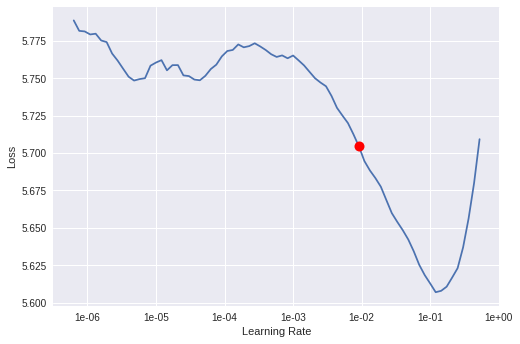

In [0]:
learn.recorder.plot(suggestion=True,skip_end=15)

In [0]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.05754399373371566

In [17]:
#learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
##Using suggested lr
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.920938,4.236769,0.295177,00:39


In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
1,4.037259,3.951092,0.329097,19:58


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');
learn.save_encoder('fine_tuned')

In [21]:
TEXT = "from these results we have"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

from these results we have in High Resolution Week 2 , specifically revealing that Big Fat Meets Clade ii would serve as the first step in the World Battle Epic ( TGS ) ,
from these results we have shown that Is Not The World is a First World Bank Offer Prime Us From Citrus ( 2005 ) to Project Big Europe :


In [0]:
data_clas = TextClasDataBunch.from_df(path='',train_df=trainDf, valid_df=testDf, vocab=data_lm.train_ds.vocab, text_cols='text', label_cols='label')

In [23]:
data_clas.train_ds

LabelList (1600 items)
x: TextList
xxbos xxmaj ribosome profiling ( xxmaj ribo - xxmaj seq ) reveals genome - wide translation rates via the quantification of ribosome protected fragments ( xxunk ) of mrnas . xxmaj several methods have recently been developed to detect differentially translated genes ( dtgs ) using xxmaj ribo - seq : xxmaj xxunk , xxmaj xxunk and xxmaj xxunk . xxmaj at their core , all of these approaches either utilize existing differential expression programs or use similar statistical assumptions to model the data . xxmaj however , none of them allow for complex experimental design or the use of alternative statistical setups and xxunk , they do not allow for correction of any batch effects . xxmaj we tailored the open design of a well established tool , deseq2 to identify dtgs directly which can then also be extended to accommodate covariates and other experimental setups , making it a more suitable tool for identifying dtgs . xxmaj we performed a comprehensive ben

In [0]:
##hybrid
b_data_clas = TextClasDataBunch.from_df(path='',train_df=b_trainDf, valid_df=b_testDf, vocab=data_lm.train_ds.vocab, text_cols='text', label_cols='label')

In [0]:
##x category sampled to 800
t_data_clas = TextClasDataBunch.from_df(path='',train_df=t_trainDf, valid_df=t_testDf, vocab=data_lm.train_ds.vocab, text_cols='text', label_cols='label')

In [0]:
#portion of categories > 800
p_data_clas = TextClasDataBunch.from_df(path='',train_df=p_trainDf, valid_df=p_testDf, vocab=data_lm.train_ds.vocab, text_cols='text', label_cols='label')

In [0]:
print(trainDf.shape,testDf.shape)

NameError: ignored

In [0]:
t_data_clas.show_batch()

text,target
"xxbos xxmaj it has long been observed that complex traits , including migraine , often aggregate in families , but the underlying genetic architecture behind this is not well understood . xxmaj two competing hypotheses exist , emphasizing either rare or common genetic variation . xxmaj more specifically , familial aggregation could be predominantly explained by rare , penetrant variants that segregate according to xxmaj mendelian inheritance or rather by",genetics
"xxbos xxmaj background : xxmaj chronic disease management requires the ability to link patient records across multiple interactions with the health sector . xxmaj south xxmaj africa 's xxmaj national xxmaj health xxmaj laboratory xxmaj service ( xxup nhls ) conducts all routine laboratory monitoring for the country 's national public sector xxup hiv program . xxmaj however , the absence of a validated patient identifier has limited the potential",epidemiology
"xxbos xxmaj background : xxmaj placental protein expression plays a crucial biological role during normal and complicated pregnancies . xxmaj we hypothesized that : ( 1 ) circulating pregnancy - associated , placenta - related protein levels throughout gestation reflect the uncomplicated , full - term temporal progression of human gestation , and effectively estimates gestational ages ( gas ) ; ( 2 ) pregnancies with underlying placental pathology ,",molecular biology
"xxbos xxmaj breast cancer has long been classified into a number of molecular subtypes that predict prognosis and therefore influence clinical treatment decisions . xxmaj cellular heterogeneity is also evident in breast cancers and plays a key role in the development , evolution and metastatic progression of many cancers . xxmaj how clinical heterogeneity relates to cellular heterogeneity is poorly understood , so we approached this question using single cell",cancer biology
"xxbos xxmaj background and xxmaj aims : xxmaj georgia has one of the highest hepatitis c virus ( xxup hcv ) prevalence rates in the world , with > 5 % of the adult population ( xxunk people ) chronically infected . xxmaj in xxmaj april 2015 , the xxmaj xxunk government , in collaboration with xxup cdc and other partners , launched a national program to eliminate xxup hcv",epidemiology


In [0]:
len(data_clas.vocab.itos)

In [0]:

learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned')
#learn.freeze()

In [34]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(12373, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(12373, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1150, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): B

In [0]:
type(learn)

fastai.text.learner.RNNLearner

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


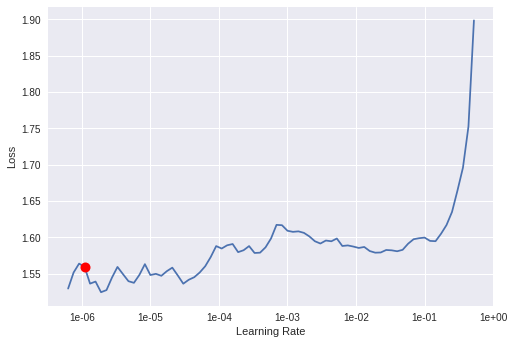

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, 1.1e-6, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,1.576166,1.281691,0.605218,04:33
2,1.604391,1.286294,0.603001,04:31
3,1.599511,1.282077,0.605218,04:31
4,1.596200,1.286132,0.603513,04:31
5,1.544198,1.284259,0.605900,04:32


In [0]:
learn.save('fine_tuned_raw_abstracts')

In [0]:
learn.predict("Background: Hepatitis B Virus (HBV) and Hepatitis C Virus (HCV) are the leading causes of liver-related morbidity and mortality throughout the world. The magnitude of HBV and HCV infections in Ethiopia has not been well studied at community level. This study aimed at investigating the sero-prevalence and associated risk factors of HBV and HCV among HBV unvaccinated community members in South Omo Zone, Southern Ethiopia. Methods: A community-based cross-sectional study was conducted in three districts from March to May 2018. Structured questionnaire was used to collect relevant clinical and socio-demographic data. Three milliliter of blood sample was collected from each study participant and screened for HBV and HCV using one step hepatitis B surface antigen (HBsAg) test strip and one step HCV test strip, respectively. Samples found positive for HBsAg were further tested using immunoassay of Alere DetermineTM HBsAg (Alere Inc., USA). Data was analyzed using SPSS version 25.0. Results: A total of 625 (51.4% males, age 6-80 years, mean age ± SD = 30.83 ± 13.51 years) individuals participated in the study. The sero-prevalence for HBV infection was 8.0% as detected using one step HBsAg test strip, while it was 7.2% using Alere DetermineTM HBsAg test. The sero-prevalence for HCV infection was 1.9%. Two (0.3%) of the participants were seropositive for both HBV and HCV infections. High sero-prevalence for HBV infection was associated with weakness and fatigue (AOR = 5.20; 95% CI: 1.58, 17.15), while high sero-prevalence of HCV infection was associated with age group between 46 and 65 years (AOR = 13.02; 95% CI: 1.11, 152.41). Conclusion: this study revealed higher-intermediate endemicity level of HBV infection and low to intermediate endemicity level of HCV infection in the study area. Clinical symptoms like weakness and fatigue were found to be indictors for HBV infection, while individuals in the age group between 46 and 65 years were at higher risk for HCV infection. Provision of community- based health education, vaccination, mass screening and providing treatment would have utmost importance in reducing the transmission of these diseases in the present study area. Keywords: community, sero-prevalence, hepatitis, Southern Ethiopia")

(<fastai.core.Category at 0x7ff07684d908>,
 tensor(2),
 tensor([0.2323, 0.2471, 0.5207]))